In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state= 1000

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/durmusayuksek/ML-USU-SP21/main/Classes/Class%2021-%20Random%20Forest%20%20(Python)/credit_card_clean.csv')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Exploring the variables:
ID : ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_1: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

Note: NT is Taiwain Dollars

In [5]:
df.isnull().sum()/len(df)

ID           0.0
LIMIT_BAL    0.0
SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
AGE          0.0
PAY_1        0.0
PAY_2        0.0
PAY_3        0.0
PAY_4        0.0
PAY_5        0.0
PAY_6        0.0
BILL_AMT1    0.0
BILL_AMT2    0.0
BILL_AMT3    0.0
BILL_AMT4    0.0
BILL_AMT5    0.0
BILL_AMT6    0.0
PAY_AMT1     0.0
PAY_AMT2     0.0
PAY_AMT3     0.0
PAY_AMT4     0.0
PAY_AMT5     0.0
PAY_AMT6     0.0
DEFAULT      0.0
dtype: float64

In [6]:
sum(df.duplicated())

0

In [7]:
# dropping the duplicates:
df.drop_duplicates(inplace=True)

In [8]:
df.nunique()

ID           30000
LIMIT_BAL       81
SEX              2
EDUCATION        4
MARRIAGE         3
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
DEFAULT          2
dtype: int64

### Encode ordinal categorical features as an integer array.
In random forest we don't need to transfer the categorical variables into dummy variables (using one-hot-encoding). However, the algorithm is not able to handle ordinal data. We should transform ordinal categorical variables into quantitative variables.

It seems that SEX, EDUCATION, MARRIAGE are ordinal categotical variables and should be transformed into numerics

In [9]:
ordinal_categoricals = ['SEX', 'EDUCATION', 'MARRIAGE']

In [10]:
from sklearn.preprocessing import OrdinalEncoder

In [11]:
enc = OrdinalEncoder()

In [12]:
df[ordinal_categoricals]= enc.fit_transform(df[ordinal_categoricals])

In [13]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,0.0,3.0,0.0,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,0.0,3.0,2.0,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0.0,3.0,2.0,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0.0,3.0,0.0,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1.0,3.0,0.0,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [14]:
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['grad', 'highschool', 'other', 'university'], dtype=object),
 array(['married', 'other', 'single'], dtype=object)]

Remember, with other machine learning models, we ended up with 78 features using the same data set because we had to transform categorical variables into dummies. But with RF, there is only 23 features to work with.

### Scaling features
In random forest, we don't need to scale the features!!

In [15]:
# first we look at target variable proportions:
pd.crosstab(df['DEFAULT'],df['DEFAULT'], normalize='all')*100

DEFAULT,0,1
DEFAULT,,
0,77.88,0.00
1,0.00,22.12


In [16]:
df.DEFAULT.value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [17]:
df.DEFAULT.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: DEFAULT, dtype: float64

### Defining the variables and splitting the data

In [19]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [20]:
y = df['DEFAULT']
X = df.drop(['DEFAULT','ID'], axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

### Random Forest Classification with Sklearn

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Fitting RF classifier to the Training set

RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
# Predicting the Test set probabilities and classes
y_hat = RF_classifier.predict(X_test)
y_hat_probs = RF_classifier.predict_proba(X_test)[:,1] 
# Predicted probabilities are reported for both classes. We saved the prob of purchased!

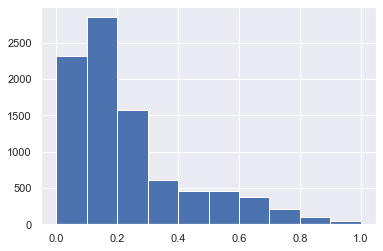

In [24]:
plt.hist(y_hat_probs)
plt.show()

### Evaluating the model performance on test data

In [25]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [26]:
print(confusion_matrix(y_test, y_hat))

[[6606  405]
 [1242  747]]


In [27]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7011
           1       0.65      0.38      0.48      1989

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



### Tuning hyperparameters:
#### Gridsearch

In [28]:
my_param_grid = {'n_estimators':[100], 'criterion':['entropy','gini'],
                 'max_features':['log2'], 'max_depth':[10]}

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=rand_state),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )
# verbose just means the text output describing the process. (the greater the number the more detail you will get).

In [31]:
# May take a while!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100; total time=   3.5s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100; total time=   3.7s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100; total time=   3.9s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100; total time=   3.8s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100; total time=   3.5s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   2.6s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   2.6s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   2.6s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   2.6s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1000),
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [10],
                         'max_features': ['log2'], 'n_estimators': [100]},
             verbose=2)

In [32]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 100}

In [33]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       random_state=1000)

In [34]:
y_hat_optimized = grid.predict(X_test)

In [35]:
print(confusion_matrix(y_test, y_hat_optimized))

[[6678  333]
 [1252  737]]


In [36]:
print(classification_report(y_test, y_hat_optimized))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7011
           1       0.69      0.37      0.48      1989

    accuracy                           0.82      9000
   macro avg       0.77      0.66      0.69      9000
weighted avg       0.81      0.82      0.80      9000



### Using Cross validation and OOB observations to estimate the R-squared in the test set
#### Cross Validation
We will use Cross Validation to estimate performance metrics in the test set.

In [38]:
from sklearn.model_selection import cross_val_score

In [40]:
Acc = cross_val_score(estimator = RandomForestClassifier(max_depth=10, max_features='log2',
                    n_estimators=100, criterion='entropy'), X = X_train, y = y_train, cv = 5 , scoring="accuracy" )

In [41]:
Acc_CV = round(np.mean(Acc),4)
Acc_CV

0.819

### Out-of-Bag errors!
We can show that on average, each bagged tree makes use of around 2/3 of the observations and 1/3 of them are not used to fit the model. These left out observations are called out-of-bag (OOB) observations. It turns out there is a very straightforward way to estimate the test errors using OOB observations.

In [42]:
Acc_oob = RandomForestClassifier(max_depth=10, max_features='log2',n_estimators=100, criterion='entropy',
                                 oob_score=True)
Acc_oob.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       oob_score=True)

In [43]:
Acc_oob.oob_score_

0.8177142857142857

### Dealing with imbalanced target variables!

In [44]:
pd.crosstab(df['DEFAULT'],df['DEFAULT'], normalize='all')*100

DEFAULT,0,1
DEFAULT,,
0,77.88,0.00
1,0.00,22.12


In [45]:
RF_balanced = RandomForestClassifier(random_state=1000, criterion='entropy', max_features='log2', 
                                     max_depth=10, class_weight='balanced_subsample')

In [46]:
y_hat_balanced = RF_balanced.fit(X_train, y_train).predict(X_test)

In [47]:
print(confusion_matrix(y_test, y_hat_balanced))

[[5973 1038]
 [ 832 1157]]


In [48]:
print(classification_report(y_test, y_hat_balanced))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7011
           1       0.53      0.58      0.55      1989

    accuracy                           0.79      9000
   macro avg       0.70      0.72      0.71      9000
weighted avg       0.80      0.79      0.80      9000



### ROC and AUC

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score

No Skill     : ROC AUC=0.500
Random Forest: ROC AUC=0.789


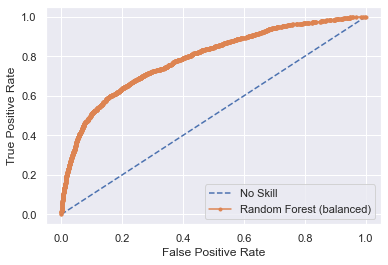

In [50]:
# generate a no skill (ns) prediction and logistic regression (lr) predictions.
ns_probs = [0 for i in range(len(y_test))]
lr_probs = RF_balanced.predict_proba(X_test)[:,1]
# calculating scores for no skill and logistic regression
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill     : ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest (balanced)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Based on AUC=0.789, the model is doing a better job compared to random prediction.

Recall: the best we could do with Logistic regression was AUC=0.66

### Feature Importance

In [51]:
features = list(X_train.columns)
features

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [52]:
importance = RF_balanced.feature_importances_
importance

array([0.04603574, 0.00478773, 0.00748084, 0.00452118, 0.02687958,
       0.21710589, 0.10171704, 0.05960842, 0.04166036, 0.03247009,
       0.03107924, 0.04566792, 0.03859525, 0.03272903, 0.02966673,
       0.02887401, 0.03012682, 0.04778028, 0.04109152, 0.03649166,
       0.03440057, 0.03182387, 0.02940622])

In [53]:
FIM = pd.DataFrame({'Features': X_train.columns , 'Feature_importance':importance})
FIM = FIM.sort_values(by=['Feature_importance'], ascending=False)
FIM

,Features,Feature_importance
5,PAY_1,0.217106
6,PAY_2,0.101717
7,PAY_3,0.059608
17,PAY_AMT1,0.047780
0,LIMIT_BAL,0.046036
11,BILL_AMT1,0.045668
8,PAY_4,0.041660
18,PAY_AMT2,0.041092
12,BILL_AMT2,0.038595
19,PAY_AMT3,0.036492


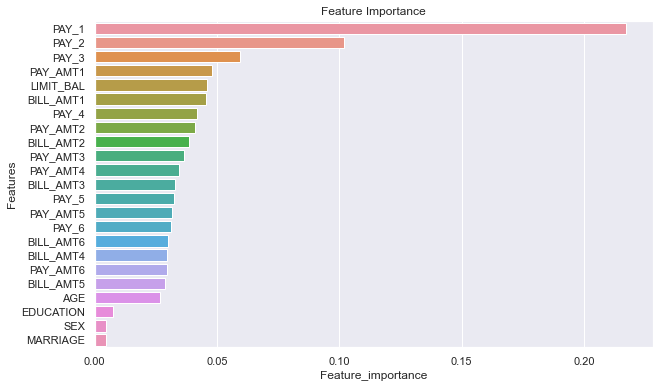

In [54]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM)
plt.show()

Recall:

- PAY_1: repayment status in the past 1 month (paid in full, paid minimum due, delay for # months)
- PAY_2: repayment status in the past 2 months
- ....
- BILL_AMT: amount of bill statement

### Additional links:
- Decision Trees with sklearn: https://scikit-learn.org/stable/modules/tree.html
- Ensemble learning with sklearn: https://scikit-learn.org/stable/modules/ensemble.html
- graphviz: this is used for Tree visualization: http://graphviz.org/
- Out of Bag errors for random forest: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py